# Notebook activity 4.5 Regression with two factors in R

In this notebook activity, we will use R to fit a model for the response `rate` from the employment rates dataset (Subsection 4.1, Unit 4), taking the factors `gender` and `age` as two factor explanatory variables (as was done in Activity 23, Subsection 4.1, Unit 4). As a reminder, the variables are as follows:

* `rate`: the 2019 employment rate (as a percentage) for people educated to a Bachelors degree or equivalent level
* `gender`: the gender the individual identifies with, taking the values male and female 
* `age`: the age groupings (in years), taking the values 25 to 34, 35 to 44, 45 to 54, and 55 to 64.

The data are stored in the data frame called `employmentRate`.

## (a) Getting started

### (i)

Start by loading the `M348` package, loading the `employmentRate` data frame and checking that `employmentRate` has loaded correctly, by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the employmentRate data frame
data(employmentRate)
# Check the data frame has loaded OK
head(employmentRate)

### (ii)

Check that both `gender` and `age` are factors by running the following code.

In [ ]:
class(employmentRate$gender)
class(employmentRate$age)

### (iii)

Check that level 1 of `gender` corresponds to male and that level 1 of `age` corresponds to 25 to 34.

In [ ]:
levels(employmentRate$gender)
levels(employmentRate$age)

## (b) Fitting the model

In order to fit a regression model for the response $Y$ with covariate $x$ and factor $A$ and save the output in the object `modelFit`, say, in Notebook activity 4.1 we used a command of the from:

`modelFit <- lm(Y ~ x + A, data = dataFrame)`.

(This assumes the vectors `Y`, `x` and `A` are in a data frame called `dataFrame`.)

Here, instead of having one covariate and one factor as explanatory variables, we have two factors $A$ and $B$. So, in order to fit a model for response $Y$, using factors $A$ and $B$ as the explanatory variables, we simply use the command:

`modelFit <- lm(Y ~ A + B, data = dataFrame)`.

As usual, we can see the resulting output from fitting the model by using the `summary()` command.

### (i)

Use the empty code cell below to fit a model for the response `rate` with the  factors `gender` and `age` as the explanatory variables. Store the results of the fitting in the object `rateFitGenderAge` and produce a summary of the results.

#### Solution <a class="tocSkip">

The code required to fit the model and produce a summary of the results is given in the code cell below, together with the resulting output.

In [4]:
rateFitGenderAge <- lm(rate ~ gender + age, data = employmentRate)
summary(rateFitGenderAge)


Call:
lm(formula = rate ~ gender + age, data = employmentRate)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.770  -3.137   0.507   4.355  20.130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   87.7773     1.0052  87.324  < 2e-16 ***
genderfemale  -8.0681     0.9016  -8.949  < 2e-16 ***
age35 to 44    5.3324     1.2706   4.197 3.61e-05 ***
age45 to 54    5.6568     1.2706   4.452 1.22e-05 ***
age55 to 64  -11.3395     1.2794  -8.863  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.729 on 289 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5199,	Adjusted R-squared:  0.5133 
F-statistic: 78.25 on 4 and 289 DF,  p-value: < 2.2e-16


###  <a class="tocSkip">

The output from the `summary()` function has the same format as we've seen when fitting models previously, but this time the table of coefficients contains ouput for the following parameters:

* `(Intercept)` is the baseline mean for `rate` for level 1 (that is, male) of the factor `gender` *and* level 1 (that is, 25 to 34) of the factor `age`
* `genderfemale` is the effect on `rate` of level 2 (that is, female) of the factor `gender` *in comparison to* the effect of level 1 (that is, male) of the factor `gender` (after controlling for `age`)
* `age35 to 44` is the effect on `rate` of level 2 (that is, 35 to 44) of the factor `age` *in comparison to* the effect of level 1 (that is, 25 to 34) of the factor `age` (after controlling for `gender`)
* `age45 to 54` is the effect on `rate` of level 3 (that is, 45 to 54) of the factor `age` *in comparison to* the effect of level 1 (that is, 25 to 34) of the factor `age` (after controlling for `gender`)
* `age55 to 64` is the effect on `rate` of level 4 (that is, 55 to 64) of the factor `age` *in comparison to* the effect of level 1 (that is, 25 to 34) of the factor `age` (after controlling for `gender`).

As usual, estimates of each parameter, together with the $p$-values associated with individual $t$-tests for each parameter, are displayed in the table. It is important to remember, however, that these $p$-values associated with the individual factor levels are of limited value because either *all* of the factor levels need to be included in the model, or *none* of them should. So, in order to decide whether individual factors should be in the model, we instead use ANOVA tests to compare model fits. 

### (ii)

Observation 119 corresponds to the employment rate for females aged 55 to 64 in Denmark. Using the `Coefficients` table you obtained in part (i), what is $\widehat{y}_{119}$ the fitted employment rate for females in the age group 55 to 64 in Denmark?

#### Solution <a class="tocSkip">

The fitted value, $Y_{119}$ is calculated as

\begin{equation*} \begin{align*}
Y_{119} & = \{\text{baseline mean}\} + \{\text{effect of female}\} + \{\text{effect of age 55 to 64}\} \\
 & = 87.7773 -8.0681 - 11.3395 \\
 & = 68.3697 \simeq 68.37.
\end{align*} \end{equation*}

###  <a class="tocSkip">

In Notebook activity 3.1 you saw that is it possible to extract fitted values for regression with a factor using a command of the form `fitted.values(modelFit)`. We can do exactly the same for regression with two factors. (Indeed for any model fitted using `lm()`.) 

### (iii) 

Run the code below to obtain $\widehat{y}_{119}$ directly.

In [ ]:
fitted.values(rateFitGenderAge)[119]

#### Solution <a class="tocSkip">

The value given by R directly is, to four decimal places, the same as the value calculated in part (ii), as we would expect. 

## (c) Testing whether both factors should be in the model.

In Subsection 4.3 (and summarised in Box 9) you saw that in order to test whether the factor $A$ should be included in the model after controlling for factor $B$, we compare the fits of the following two models:

* $Y \sim B$, the model which doesn't include $A$
* $Y \sim A + B$, the model which includes $A$.

Similarly, to test whether the factor $B$ should be included in the model after controlling for factor $A$, we compare the fits of the following two models:

* $Y \sim A$, the model which doesn't include $B$
* $Y \sim A + B$, the model which includes $B$.

In both cases the comparison is done using an ANOVA test. 

Recall Notebook activity 4.1, we can use the `anova()` function to do such an ANOVA test. In general the command for carrying out the required ANOVA test and obtaining the associated test statistic value and $p$-value is `anova(fit1, fit2)` where `fit1` is the object name storing output from the smaller model and `fit2` is the object name storing output from the larger model (that is, the larger model with smaller RSS).

### Do we need `gender` in the model in addition to `age`?

We have already fitted the model: `rate ~ gender + age` and stored the results in the object `rateFitGenderAge`. However, to explore whether we need `gender` in the model in addtion to `age` we also need to fit the simpler model `rate ~ age`.

### (i)

In the empty code cell below, fit the model `rate ~ age`, storing the results in the object `rateFitAge`. (You won't need to see a summary of the results.)

#### Solution <a class="tocSkip">

The code to fit the model, storing the results in the object `rateFitAge`, is given in the code cell below. We don't need a summary of the results (and we don't need to use `summary()`), so running the code won't produce any on screen results.

In [6]:
rateFitAge <- lm(rate ~ age, data = employmentRate)

### (ii)

Run the code cell below to carry out the test of whether `gender` should be included in the model in addition to `age`.

In [ ]:
anova(rateFitAge, rateFitGenderAge)

### (iii)

What do you conclude from the output you produced in part (ii)?

#### Solution <a class="tocSkip">

The resulting $p$-value for the test is extremely small, and so we conclude that `gender` *should* be included in the model in addition to `age`.

### Do we need `age` in the model in addition to `gender`?

In order to test whether the factor `age` should be included in the model after controlling for factor `gender`, we need to compare the fits of the model which includes `age`, `rate ~ gender + age`, and the model which doesn't include `age`, `rate ~ gender`. From part (b)(i) we already have the fit of `rate ~ gender + age` stored in the object `rateFitGenderAge`. So we just need to fit the model `rate ~ gender` before we can do the test.

### (iv)

Use the empty code cell below to fit the model `rate ~ gender` storing the results in `rateFitGender` and to obtain the results from the ANOVA test for whether `age` should be included in the model in addition to `gender`. 

#### Solution <a class="tocSkip">

The required code and resulting output is given below.

In [8]:
# Fit model without age
rateFitGender <- lm(rate ~ gender, data = employmentRate)

# Test whether age should be in the model
anova(rateFitGender, rateFitGenderAge)

Res.Df RSS      Df Sum of Sq F        Pr(>F)     
1 292    30991.01 NA       NA        NA          NA
2 289    17262.60  3 13728.41  76.61094 1.72521e-36

### (v)

What do you conclude from the results you obtained in part (iv)?

#### Solution <a class="tocSkip">

The resulting $p$-value for the test is again extremely small, and so we conclude that `age` *should* be included in the model in addition to `gender`.

## (d) Diagnostic plots

As usual, the `plot()` function can be used to produce the diagnostic plots associated with the fitted model that includes both factors. 

### (i)

Use the empty code cell below to produce the residual plot and the normal probability plot for the fitted model
`rate ~ gender + age`.

#### Solution <a class="tocSkip">

The required code and resulting plots are given below.

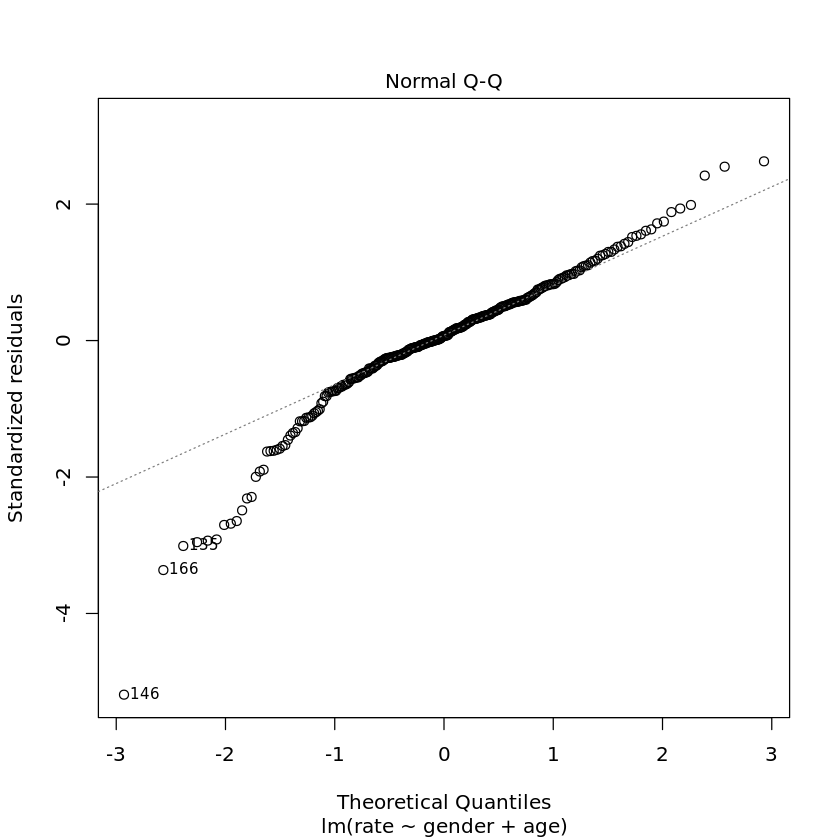

In [9]:
# Residual plot
plot(rateFitGenderAge, 1)
# Normal probabiltiy plot
plot(rateFitGenderAge, 2)

### (ii)

Based on the plots you obtained in part (i), do the assumptions that the error terms $W_1, W_2,\ldots,W_n$ are normally distributed with zero mean and constant variance seem reasonable?

#### Solution <a class="tocSkip">

The residuals seem to be fairly evenly distributed about the zero residual line, and so the assumption of zero mean seems reasonable. However, the variation about the zero residual line seems to decrease as the fitted values increase, suggesting that the assumption of constant variance may be questionable. 

The assumption of normality may also be questionable, since the points in the normal probability plot deviate from the line at either end of the plot, but particularly so for the lower values.